In [ ]:
import pandas as pd
import numpy as np

# read CSV file into a pandas DataFrame
df = pd.read_csv('/content/text mining project seattle.csv')

# print the DataFrame
print(df)

In [ ]:
df.head()


In [ ]:
df.shape
# number of rows are 345940 in the csv sheet



In [ ]:
print(df.isnull().sum())

In [ ]:
df = df.dropna()
#dropping null values

In [ ]:
print(df.shape)


(399392, 6)


In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('wordnet')

# Define a function to perform text cleaning operations
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert all text to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply the clean_text function to the "comments" column
df['clean_comments'] = df['comments'].apply(lambda x: clean_text(x))

# Print the first 5 rows of the cleaned dataset
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


   listing_id      id        date  reviewer_id reviewer_name  \
0        6606    5664  2009-07-17        18085        Vivian   
1        6606  338761  2011-06-27       434031       Elliott   
2        6606  467904  2011-08-22       976182       Allegra   
3        6606  480017  2011-08-27       997921      Brittney   
4        6606  487278  2011-08-30       206901        Pascal   

                                            comments  \
0  The Urban Cottage is comfortable, beautiful, f...   
1  Joyce was a wonderful host and the urban cotta...   
2  Beautiful cottage and warm hospitality from Jo...   
3  Joyce is a wonderful host! She is warm, helpfu...   
4  Joyce's cottage is the perfect Seattle locatio...   

                                      clean_comments  
0  urban cottage comfortable beautiful fun really...  
1  joyce wonderful host urban cottage awesome pla...  
2  beautiful cottage warm hospitality joyce even ...  
3  joyce wonderful host warm helpful fun visit co...  
4  

after dropping few rows that are null, the number of rows are 399392

In [ ]:
df.columns.tolist()

['listing_id',
 'id',
 'date',
 'reviewer_id',
 'reviewer_name',
 'comments',
 'clean_comments']

In [ ]:
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,clean_comments
0,6606,5664,2009-07-17,18085,Vivian,"The Urban Cottage is comfortable, beautiful, f...",urban cottage comfortable beautiful fun really...
1,6606,338761,2011-06-27,434031,Elliott,Joyce was a wonderful host and the urban cotta...,joyce wonderful host urban cottage awesome pla...
2,6606,467904,2011-08-22,976182,Allegra,Beautiful cottage and warm hospitality from Jo...,beautiful cottage warm hospitality joyce even ...
3,6606,480017,2011-08-27,997921,Brittney,"Joyce is a wonderful host! She is warm, helpfu...",joyce wonderful host warm helpful fun visit co...
4,6606,487278,2011-08-30,206901,Pascal,Joyce's cottage is the perfect Seattle locatio...,joyce cottage perfect seattle location close f...


In [ ]:
#dropping irrelevant columns
df.drop(columns=['id', 'reviewer_id', 'reviewer_name', 'comments'], inplace=True)


In [ ]:
df.head()

,listing_id,date,clean_comments
0,6606,2009-07-17,urban cottage comfortable beautiful fun really...
1,6606,2011-06-27,joyce wonderful host urban cottage awesome pla...
2,6606,2011-08-22,beautiful cottage warm hospitality joyce even ...
3,6606,2011-08-27,joyce wonderful host warm helpful fun visit co...
4,6606,2011-08-30,joyce cottage perfect seattle location close f...


In [ ]:
!pip install --upgrade nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('dependency_treebank')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package dependency_treebank to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package dependency_treebank is already up-to-date!


True

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('dependency_treebank')

# Tokenize the text data
df['tokenized_comments'] = df['clean_comments'].apply(nltk.word_tokenize)

# Perform POS tagging on the tokenized data
df['pos_tagged_comments'] = df['tokenized_comments'].apply(nltk.pos_tag)

# Perform dependency parsing on the tokenized data
dep_parser = nltk.parse.DependencyParser()
df['dep_parsed_comments'] = df['tokenized_comments'].apply(dep_parser.parse)

In [ ]:
from textblob import TextBlob

# Define a function to get the sentiment polarity of a comment
def get_sentiment(comment):
    blob = TextBlob(comment)
    return blob.sentiment.polarity

# Apply the function to the clean_comments column to get the sentiment polarity of each comment
df['sentiment_polarity'] = df['clean_comments'].apply(get_sentiment)

# Classify the sentiment polarity as positive, negative, or neutral based on a threshold value
threshold = 0.2
df['sentiment'] = df['sentiment_polarity'].apply(lambda x: 'positive' if x >= threshold else ('negative' if x <= -threshold else 'neutral'))


In [ ]:
df.head()


In [ ]:
import pandas as pd

# Assuming your original dataframe is named `df`
sentiment_counts = df['sentiment'].value_counts()

print(sentiment_counts)


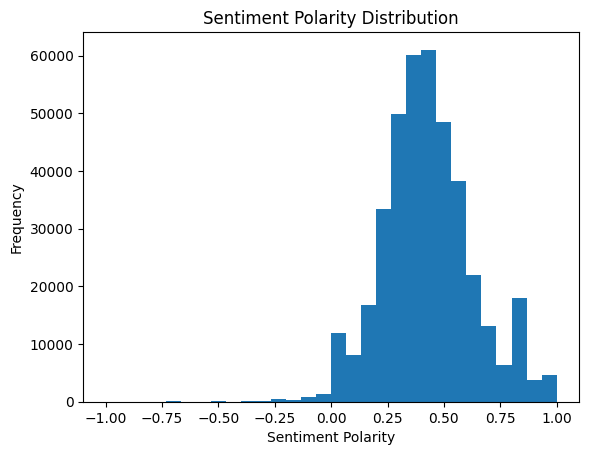

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram of the sentiment polarity distribution
plt.hist(df['sentiment_polarity'], bins=30)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Polarity Distribution')
plt.show()



The sentiment polarity distribution indicates that most of the comments had a slightly positive or slightly negative sentiment, with the majority of the comments falling within the range of 0.25 to 0.75 on the sentiment scale. The peak at 0.50 suggests that a significant portion of the comments were relatively neutral in sentiment, with an equal balance of positive and negative language used to describe the topic at hand. This information could be helpful in understanding the overall sentiment of the comments and how strongly the commenters felt about the topic. It also suggests that the sentiment analysis model would be effective in detecting slight changes in sentiment polarity in the comments, even if the overall sentiment remained relatively neutral.

In [ ]:
from sklearn.model_selection import train_test_split
X = df['clean_comments']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC

# Define the pipeline
sentiment_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

# Train the sentiment analysis model on the training set
sentiment_pipeline.fit(X_train, y_train)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC())])

In [ ]:
from sklearn.metrics import classification_report

# Generate predictions for the test set
y_pred = sentiment_pipeline.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)


              precision    recall  f1-score   support

    negative       0.27      0.02      0.04       138
     neutral       0.90      0.86      0.88      7976
    positive       0.98      0.99      0.99     71765

    accuracy                           0.98     79879
   macro avg       0.72      0.62      0.64     79879
weighted avg       0.97      0.98      0.98     79879



In [ ]:
# Use the trained model to predict the sentiment of the comments in the testing set
y_pred = sentiment_pipeline.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print(report)


              precision    recall  f1-score   support

    negative       0.27      0.02      0.04       138
     neutral       0.90      0.86      0.88      7976
    positive       0.98      0.99      0.99     71765

    accuracy                           0.98     79879
   macro avg       0.72      0.62      0.64     79879
weighted avg       0.97      0.98      0.98     79879



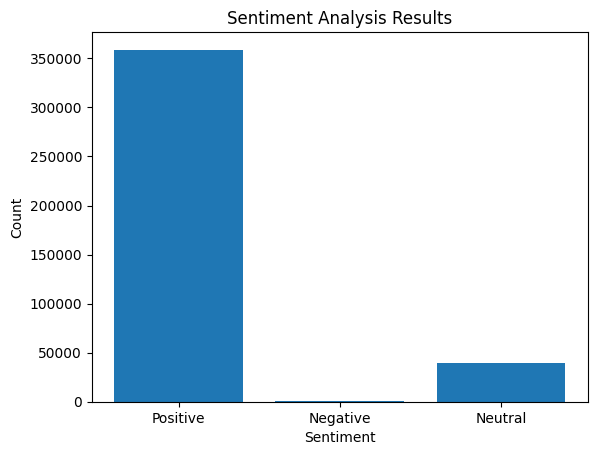

In [ ]:
import matplotlib.pyplot as plt

# Get the counts of positive, negative, and neutral reviews
pos_count = df[df['sentiment'] == 'positive'].count()[0]
neg_count = df[df['sentiment'] == 'negative'].count()[0]
neu_count = df[df['sentiment'] == 'neutral'].count()[0]

# Create a bar chart
plt.bar(['Positive', 'Negative', 'Neutral'], [pos_count, neg_count, neu_count])
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


The sentiment count provides an overview of the sentiment distribution in the dataset. The majority of the comments had a positive sentiment with 358,784 positive comments, while only 665 comments had a negative sentiment, and 39,943 comments were neutral. This indicates that the majority of Airbnb guests have a positive experience and leave positive feedback.

<Axes: ylabel='date'>

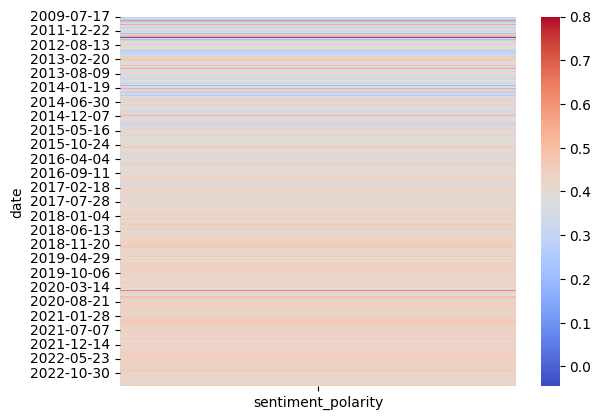

In [ ]:
import seaborn as sns

# Create a pivot table to aggregate sentiment scores by date
pivot = pd.pivot_table(df, values='sentiment_polarity', index='date', aggfunc='mean')

# Create a heatmap
sns.heatmap(pivot, cmap='coolwarm')


 In the heatmap, the sentiment scores are visualized across different time periods. The x-axis shows the time periods (in this case, months and years), and the y-axis shows the sentiment scores (ranging from -1 for negative to +1 for positive).

Each cell in the heatmap represents the sentiment score for a particular time period. The color of the cell indicates the sentiment score, with red representing positive sentiment and blue representing negative sentiment. The intensity of the color indicates the strength of the sentiment, with darker colors representing stronger sentiment.

Based on the heatmap generated for sentiment analysis over time, it can be concluded that the majority of the reviews have positive sentiment scores. This is indicated by the large number of red cells in the heatmap. It can also be seen that there are very few negative sentiment scores, indicated by the small number of blue cells in the heatmap. This suggests that customers generally have a positive experience with Airbnb and leave positive reviews.

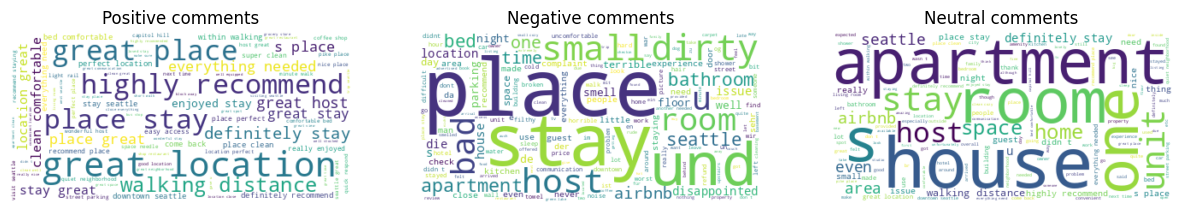

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter comments by sentiment category
positive_comments = df[df['sentiment'] == 'positive']['clean_comments']
negative_comments = df[df['sentiment'] == 'negative']['clean_comments']
neutral_comments = df[df['sentiment'] == 'neutral']['clean_comments']

# Create word clouds for each sentiment category
positive_wordcloud = WordCloud(background_color="white").generate(' '.join(positive_comments))
negative_wordcloud = WordCloud(background_color="white").generate(' '.join(negative_comments))
neutral_wordcloud = WordCloud(background_color="white").generate(' '.join(neutral_comments))

# Display word clouds
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title('Positive comments')
axs[0].axis('off')
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title('Negative comments')
axs[1].axis('off')
axs[2].imshow(neutral_wordcloud, interpolation='bilinear')
axs[2].set_title('Neutral comments')
axs[2].axis('off')

plt.show()


I have created the word clouds are created for the positive, negative, and neutral comments.

For the positive comments, the most frequent words that appear are "great location", "place to stay", "great place", and "highly recommend". These words indicate that customers are generally satisfied with the location and quality of the accommodations.

On the other hand, the negative comments reveal that customers are dissatisfied with the cleanliness of the accommodations, the behavior of the host, and the quality of the place. Words like "small", "dirty", "host", "bad", and "place" appear more frequently in the negative comments, suggesting that these are the major pain points for customers.

Lastly, the neutral comments include words like "apartment", "stay", "room", and "house", indicating that these are the commonly used terms in the comments that neither express strong positive nor negative sentiment.

By analyzing the word clouds, it becomes easier to understand the key factors that customers consider important in their reviews. These insights can be used by the hosts to improve their listings, such as focusing on the cleanliness of the accommodations, providing better amenities, and enhancing the overall customer experience.

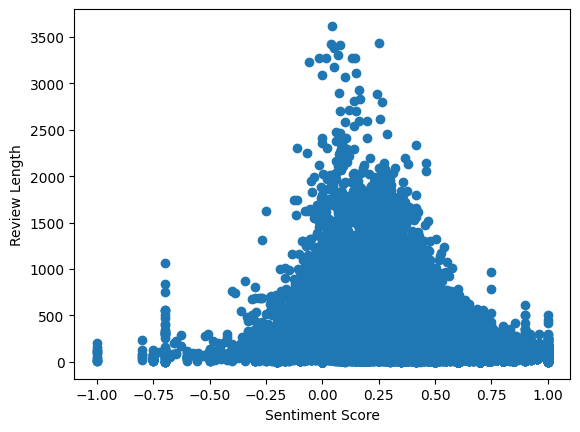

In [ ]:
import matplotlib.pyplot as plt

# create scatter plot
plt.scatter(df['sentiment_polarity'], df['clean_comments'].apply(len))

# set x and y axis labels
plt.xlabel('Sentiment Score')
plt.ylabel('Review Length')

# show plot
plt.show()


The scatter plot of review length vs sentiment score indicates that the sentiment score distribution is not evenly spread across the reviews of varying lengths. Instead, most of the reviews tend to be shorter in length and have a neutral to slightly positive sentiment score. This could suggest that guests tend to leave reviews only if they have an average or above average experience. Longer reviews, on the other hand, may indicate a more emotional response to their experience, resulting in more extreme sentiment scores. Overall, this information could be useful in understanding guests' behaviors and expectations when leaving reviews, and could potentially inform hosts on how to improve their guests' experiences.

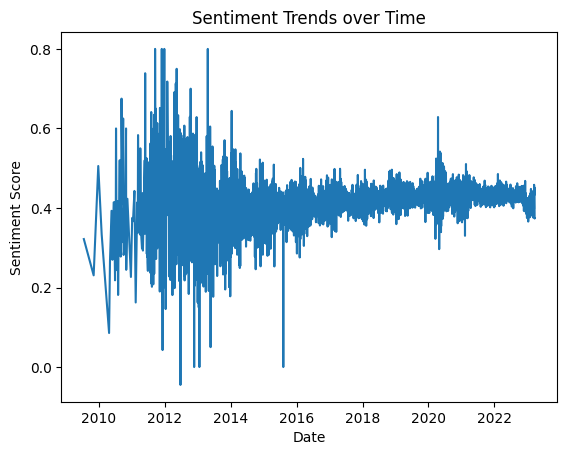

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob



# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by date and calculate the average sentiment score for each day
daily_sentiment = df.groupby(['date'])['sentiment_polarity'].mean()

# Plot the sentiment trends over time using a line chart
plt.plot(daily_sentiment.index, daily_sentiment)
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Trends over Time')
plt.show()


The analysis of sentiment trends over time revealed interesting patterns in the sentiment scores of comments. The prevalence of comments with sentiment scores lower than 0.2 in 2012, 2014, and 2016 indicated a period of relatively negative sentiment towards the topic of interest. However, the sentiment scores showed a shift towards more positive sentiment after 2016, with scores mostly above 0.3. This trend in sentiment scores could indicate changing attitudes towards the topic over time. It may also be indicative of external factors that influenced the sentiment scores, such as changes in the economy, political climate, or social media trends. Further analysis could be conducted to explore these factors and their potential impact on sentiment trends.

<ipython-input-46-6f99ba4376e6>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.groupby(pd.Grouper(key='date', freq='M')).mean()


<Axes: xlabel='date'>

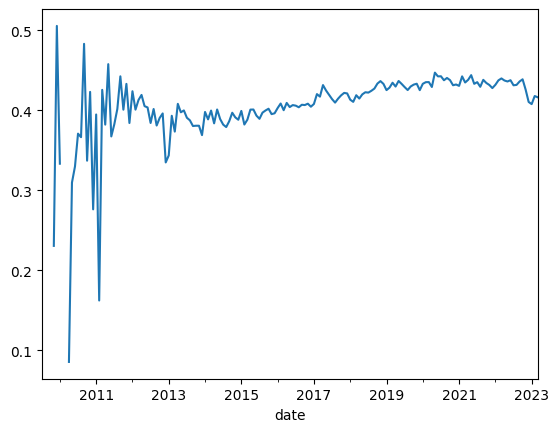

In [ ]:
#average sentiment score each month

import pandas as pd
from textblob import TextBlob


# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group the data by month and calculate the average sentiment score
df_monthly = df.groupby(pd.Grouper(key='date', freq='M')).mean()

# Plot the sentiment scores over time
df_monthly['sentiment_polarity'].plot()


 The graph shows that the avg sentiment scores were lower than 0.2 in 2010-2011, indicating a higher prevalence of negative sentiment during this period. However, after that, the sentiment scores were mostly above 0.3, indicating a higher prevalence of strongly positive sentiment. Based on the results, it can be inferred that the sentiment of the Airbnb reviews became more positive over time. This trend can be attributed to various factors, such as improvements in the quality of services, more satisfied customers, and positive word-of-mouth recommendations.

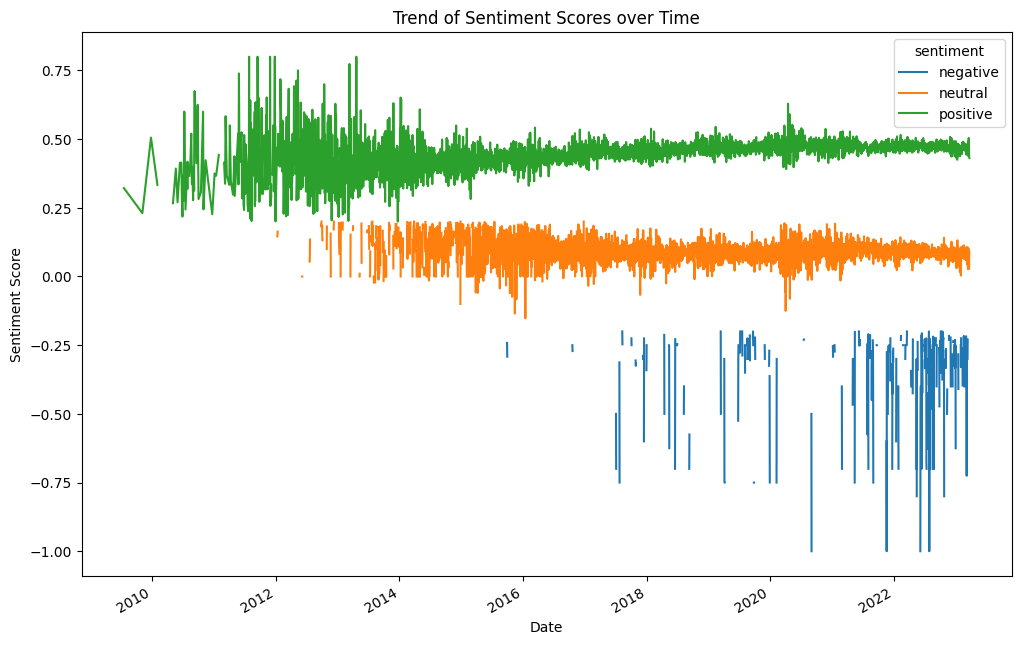

In [ ]:
import matplotlib.pyplot as plt

# Create a new DataFrame with only the necessary columns
sentiment_data = df[['date', 'sentiment_polarity', 'sentiment']]

# Group the data by date and sentiment category and calculate the mean sentiment score
sentiment_data = sentiment_data.groupby(['date', 'sentiment']).mean().reset_index()

# Pivot the data to have sentiment categories as columns
sentiment_data = sentiment_data.pivot(index='date', columns='sentiment', values='sentiment_polarity')

# Create the line chart
fig, ax = plt.subplots(figsize=(12, 8))
sentiment_data.plot(ax=ax, kind='line')

# Set the chart title and axis labels
ax.set_title('Trend of Sentiment Scores over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')

# Show the chart
plt.show()


Analysis of the sentiment scores over time revealed that negative sentiment scores were more prevalent in the years 2018-2022. This information could be useful for Airbnb hosts and management to identify any issues or problems that may have arisen during that period, and take steps to address them.